# CIFAR - 10
## INTEGRANTES
### FRANCISCA ALEJANDRA HERNANDEZ PIÑA - 19.422.959-3 - ♀	
### MARCELO ANTONIO LAZO CHAVEZ - 19.303.360-1 - ♂	

# MODELOS CONVENCIONALES

## Importando cositas

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import sys
import os
from tqdm import tqdm
import requests
import tarfile
import pickle

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## Definir variables estáticas

In [2]:
file_data = 'cifar-10-python.tar.gz'
default_batch_path = './cifar-10-batches-py/'
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
extension_archivo = '.goku'

## Descargar Dataset

In [3]:
def DownloadDataSet():
    chunk_size = 1024
    url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
    r = requests.get(url, stream = True)
    total_size = int(r.headers['content-length'])
    with open("cifar-10-python.tar.gz", 'wb') as f:
        for data in tqdm(iterable = r.iter_content(chunk_size = chunk_size), total = total_size/chunk_size, unit = 'KB'):
            f.write(data)

def VerifyDataSet():
    print("Verificando Archivos del Data Set")
    if not os.path.isfile(file_data):
        DownloadDataSet()
    DescomprimirTar()
    print("Verificación Completada")
    

def DescomprimirTar():
     with tarfile.open(file_data) as tar:
            tar.extractall()
            tar.close()

In [4]:
VerifyDataSet()

Verificando Archivos del Data Set
Verificación Completada


## Analizando Dataset

In [5]:
def load_batch(name_file):
    import pickle
    with open(default_batch_path + name_file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    # ES EL VECTOR/TENSOR1 con los id al cual pertenece la imagen
    labels = dict[b'labels']
    # MATRIZ CON LOS DATOS DE LOS BYTES RGB DE LA IMAGEN, SON 3072
    data = dict[b'data']
    # HAY QUE DIVIDIRLO POR 3 PARA CADA CANAL ROJO, VERDE Y AZUL Y DEJARLOS EN UNA MATRIZ DE 32X32 
    #data = data.reshape((len(dict[b'data']), 3, 32, 32))
    # LO DEJAMOS EN FORMATO HEIGHT, WIDTH Y CHANNEL
    #data = data.transpose(0, 2, 3, 1) ## (1000,32,32,3)
    return labels, data

In [6]:
label1, data1 = load_batch('data_batch_1')

In [7]:
data1.shape

(10000, 3072)

In [8]:
def Obtener_Todos_Batch():
    total_data = []
    total_label = []
    for i in range(1,6):
        label_temp, data_temp = load_batch('data_batch_' + str(i))
        total_data.extend(data_temp)
        total_label.extend(label_temp)
    return total_label, np.array(total_data)

In [9]:
total_label, total_data = Obtener_Todos_Batch()

In [10]:
total_data.shape

(50000, 3072)

In [11]:
label_test, data_test = load_batch("test_batch")

In [12]:
data_test.shape

(10000, 3072)

## Aplicando PCA

In [13]:
pca = PCA()
pca.fit_transform(total_data)

array([[-1.63225950e+03,  6.95904885e+02,  3.82936183e+02, ...,
        -1.94383396e-01, -2.96716275e-01, -8.91909421e-02],
       [ 2.11594763e+02, -2.42235521e+02,  1.53095691e+03, ...,
         2.76508201e-02,  1.47062424e-01, -1.96606511e-01],
       [ 1.97120094e+03, -2.93813609e+03, -7.02173229e+02, ...,
        -2.66373278e-01, -5.45969636e-02, -1.00334729e-01],
       ...,
       [ 1.80373380e+02, -2.89234292e+03, -1.00448294e+02, ...,
        -9.69870999e-02,  4.75402487e-01,  3.69202335e-01],
       [ 2.89881680e+03, -8.60874301e+02,  1.41938040e+03, ...,
        -1.19109692e-01,  1.89968105e-01, -4.26015893e-01],
       [ 1.06916310e+03, -3.01968063e+02, -1.13372056e+03, ...,
         2.46831906e-01,  6.12928127e-02, -7.15290870e-03]])

In [14]:
pca.explained_variance_

array([3.60000005e+06, 1.39326043e+06, 8.28840574e+05, ...,
       1.07089689e-01, 1.04648845e-01, 1.03207059e-01])

In [15]:
pca.explained_variance_.shape

(3072,)

In [9]:
pca_K = PCA()
pca_K.fit_transform(total_data)

array([[-1.63225950e+03,  6.95904885e+02,  3.82936183e+02, ...,
        -1.94383396e-01, -2.96716275e-01, -8.91909421e-02],
       [ 2.11594763e+02, -2.42235521e+02,  1.53095691e+03, ...,
         2.76508201e-02,  1.47062424e-01, -1.96606511e-01],
       [ 1.97120094e+03, -2.93813609e+03, -7.02173229e+02, ...,
        -2.66373278e-01, -5.45969636e-02, -1.00334729e-01],
       ...,
       [ 1.80373380e+02, -2.89234292e+03, -1.00448294e+02, ...,
        -9.69870999e-02,  4.75402487e-01,  3.69202335e-01],
       [ 2.89881680e+03, -8.60874301e+02,  1.41938040e+03, ...,
        -1.19109692e-01,  1.89968105e-01, -4.26015893e-01],
       [ 1.06916310e+03, -3.01968063e+02, -1.13372056e+03, ...,
         2.46831906e-01,  6.12928127e-02, -7.15290870e-03]])

In [14]:
def Calculate_Best_K_OPT():
    k = 0
    k_opt = 0
    total = sum(pca_K.explained_variance_)
    current_sum = 0
    k_values = []
    var_values = []
    while(k< 1000):
        if(current_sum / total < 0.99):
            k_opt = k
        current_sum += pca_K.explained_variance_[k]
        k_values.append(k)
        var_values.append(current_sum/total)
        k += 1
    return k, k_opt, k_values, var_values

In [15]:
k, k_opt, k_values, variance_values = Calculate_Best_K_OPT()

Text(0, 0.5, 'Varianza')

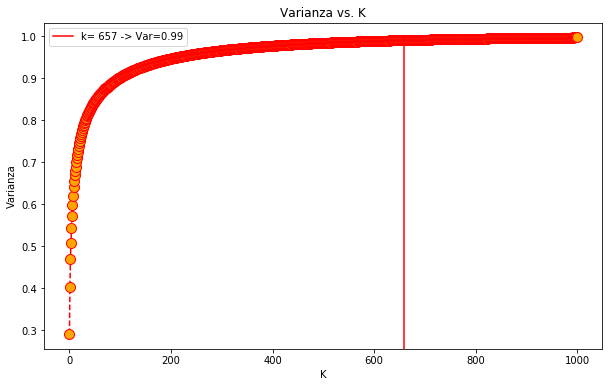

In [16]:
plt.figure(figsize=(10,6))
plt.plot(k_values,variance_values,color='red', linestyle='dashed', marker='o',
         markerfacecolor='orange', markersize=10)
plt.title('Varianza vs. K')
plt.xlabel('K')
plt.axvline(658, 0, 0.95,label='k= '+ str(k_opt) +' -> Var='+str(0.99),c='r')
plt.legend()
plt.ylabel('Varianza')

In [16]:
def Calculate_Best_K():
    k = 0
    total = sum(pca.explained_variance_)
    current_sum = 0
    
    while(current_sum / total < 0.99):
        current_sum += pca.explained_variance_[k]
        k += 1
    return k

In [17]:
Calculate_Best_K()

658

In [18]:
pca = PCA(n_components=Calculate_Best_K(), whiten=True)

x_train_pca = pca.fit_transform(total_data)
x_test_pca = pca.transform(data_test)

In [19]:
x_train_pca.shape

(50000, 658)

### Importando cositas (de nuevo)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

### RANDOM FOREST

In [20]:
rf = RandomForestClassifier()
rf.fit(x_train_pca, total_label)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [21]:
label_predict_rf = rf.predict(x_test_pca)

random_forest_score = accuracy_score(label_test, label_predict_rf)
random_forest_score

0.3908

In [32]:
print(confusion_matrix(label_test,label_predict_rf))
print(classification_report(label_test,label_predict_rf))

[[480  62  63  37  28  29  34  44 174  49]
 [ 43 530  22  44  19  25  38  44  65 170]
 [106  45 266  88 193  75  93  57  45  32]
 [ 68  69  81 245  78 185 107  60  46  61]
 [ 60  32 150  68 364  59 136  75  30  26]
 [ 44  60 106 177  82 306  71  78  46  30]
 [ 14  52 109  82 130  80 433  42  23  35]
 [ 56  70  69  90  94 105  54 314  43 105]
 [125  96  16  42  22  33  16  27 553  70]
 [ 58 231  21  45  14  28  36  63  87 417]]
              precision    recall  f1-score   support

           0       0.46      0.48      0.47      1000
           1       0.43      0.53      0.47      1000
           2       0.29      0.27      0.28      1000
           3       0.27      0.24      0.26      1000
           4       0.36      0.36      0.36      1000
           5       0.33      0.31      0.32      1000
           6       0.43      0.43      0.43      1000
           7       0.39      0.31      0.35      1000
           8       0.50      0.55      0.52      1000
           9       0.42     

### KNN

In [22]:
## Training 
knn = KNeighborsClassifier()
knn.fit(x_train_pca, total_label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [23]:
## Predicting
y_pred_knn = knn.predict(x_test_pca)

knn_score = accuracy_score(label_test, y_pred_knn)
knn_score

0.1453

In [33]:
print(confusion_matrix(label_test,y_pred_knn))
print(classification_report(label_test,y_pred_knn))

[[196   0  15   3  58   0   2   0 726   0]
 [123  16   7   4 112   0   4   0 734   0]
 [105   0  53   6 204   2   2   0 628   0]
 [ 96   0  14  16 172   1   1   0 700   0]
 [ 77   0  10   3 283   0   2   0 625   0]
 [111   0  22  11 174   2   1   0 679   0]
 [ 75   0  11  11 241   1  15   0 646   0]
 [122   0  24  12 237   1   3   2 599   0]
 [ 77   0   6   2  46   0   0   0 869   0]
 [ 86   0  18  10 142   1   1   0 741   1]]
              precision    recall  f1-score   support

           0       0.18      0.20      0.19      1000
           1       1.00      0.02      0.03      1000
           2       0.29      0.05      0.09      1000
           3       0.21      0.02      0.03      1000
           4       0.17      0.28      0.21      1000
           5       0.25      0.00      0.00      1000
           6       0.48      0.01      0.03      1000
           7       1.00      0.00      0.00      1000
           8       0.13      0.87      0.22      1000
           9       1.00     

### Regresión Logistica

In [24]:
lr = LogisticRegression()
lr.fit(x_train_pca, total_label)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
## Predicting
y_pred_lr = lr.predict(x_test_pca)
logistic_regression_score = accuracy_score(label_test, y_pred_lr)
logistic_regression_score

0.4019

In [34]:
print(confusion_matrix(label_test,y_pred_lr))
print(classification_report(label_test,y_pred_lr))

[[491  52  61  32  17  28  23  59 169  68]
 [ 59 460  35  38  30  45  37  49  80 167]
 [ 97  45 282  88 116  83 136  82  46  25]
 [ 41  59  94 255  75 191 137  53  34  61]
 [ 55  19 140  68 290  94 169 112  28  25]
 [ 33  42  90 185  90 333  81  72  46  28]
 [ 20  32  78 130  98  96 460  42  17  27]
 [ 44  46  74  69  86  87  34 448  37  75]
 [146  70  24  32  13  35  12  21 539 108]
 [ 73 180  16  27  18  29  52  57  87 461]]
              precision    recall  f1-score   support

           0       0.46      0.49      0.48      1000
           1       0.46      0.46      0.46      1000
           2       0.32      0.28      0.30      1000
           3       0.28      0.26      0.27      1000
           4       0.35      0.29      0.32      1000
           5       0.33      0.33      0.33      1000
           6       0.40      0.46      0.43      1000
           7       0.45      0.45      0.45      1000
           8       0.50      0.54      0.52      1000
           9       0.44     

### SVM

In [26]:
svc = svm.SVC()
svc.fit(x_train_pca, total_label)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [27]:
## Predicting 
y_pred_svm = svc.predict(x_test_pca)
svc_score = accuracy_score(label_test, y_pred_svm)
svc_score

0.4833

In [35]:
print(confusion_matrix(label_test,y_pred_svm))
print(classification_report(label_test,y_pred_svm))

[[524  63  55  28  20  12  15  27 150 106]
 [ 42 627   9  23  13  16  19  27  32 192]
 [ 83  44 356  88 123  75 101  53  27  50]
 [ 23  63  83 356  66 185  93  48  18  65]
 [ 34  25 155  84 379  76 101  91  25  30]
 [ 18  46  87 217  73 365  57  74  16  47]
 [ 10  63  81 105  78  54 520  31  10  48]
 [ 27  61  51  73  78  76  20 493  21 100]
 [113  91  26  26  11  28   9  11 604  81]
 [ 55 189   7  22   7  10  28  31  42 609]]
              precision    recall  f1-score   support

           0       0.56      0.52      0.54      1000
           1       0.49      0.63      0.55      1000
           2       0.39      0.36      0.37      1000
           3       0.35      0.36      0.35      1000
           4       0.45      0.38      0.41      1000
           5       0.41      0.36      0.38      1000
           6       0.54      0.52      0.53      1000
           7       0.56      0.49      0.52      1000
           8       0.64      0.60      0.62      1000
           9       0.46     

## Comparando presición de modelos

In [28]:
print("RandomForestClassifier : ", random_forest_score)
print("K Nearest Neighbors : ", knn_score)
print("Logistic Regression : ", logistic_regression_score)
print("Support Vector Classifier : ", svc_score)

RandomForestClassifier :  0.3908
K Nearest Neighbors :  0.1453
Logistic Regression :  0.4019
Support Vector Classifier :  0.4833
